### NBD Challenge #1 
- Cruoglio Antonella - 2025992
- Iovino Giuliana - 2017512
- Mascolo Davide - 2001991
- Napoli Mario - 2015169

#### Part 1

1.

In [9]:
## Import libraries and utils
import networkx as nx
import fnss
import numpy as np
import matplotlib.pyplot as plt
import random
from networkx.linalg.graphmatrix import adjacency_matrix
import time
import matplotlib as mpl
from tqdm import tqdm
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#003f5c", "#bc5090", "#ffa600"]) 
plt.style.use('ggplot')

In [10]:
## Erdos-Renyi random graph
def graph_ER(K, p):
    G_ER = nx.erdos_renyi_graph(K, p)
    return G_ER

In [11]:
## R-regular random graph
def graph_RR(d, n):
    G_RR = nx.random_regular_graph(d, n)
    return G_RR

In [ ]:
## Generating Erdos-Renyi graph
G_ER = graph_ER(10, 0.5)

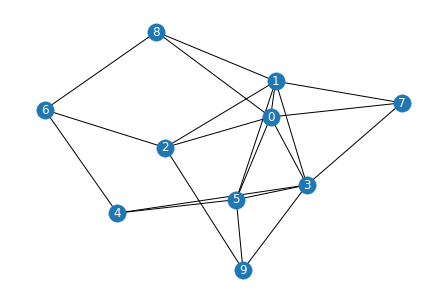

In [ ]:
## Plot
nx.draw(G_ER,
        font_color="#FFFFFF",
        font_family = 'sans-serif',
        with_labels=True)

In [ ]:
## Generating R-regular graph
G_RR = graph_RR(5, 10)

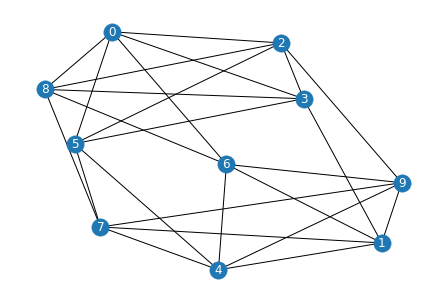

In [ ]:
## Plot
nx.draw(G_RR,
        font_color="#FFFFFF",
        font_family = 'sans-serif',
        with_labels=True)

2.

In [ ]:
## Irreducibility method for the graph
def irreducibility(G):

    A = np.array(nx.adjacency_matrix(G).todense())
    I = np.identity(len(A))
    for i in range(1, len(A)):
        I+= np.linalg.matrix_power(A,i)

    return (I>0).all()

In [ ]:
## Eigenvalue of the Laplacian matrix
def eigenvalue(G):
    A_ER = np.array(nx.adjacency_matrix(G).todense())
    D_ER = np.zeros((A_ER.shape[0], A_ER.shape[1]))

    for i in range(A_ER.shape[0]):
        D_ER[i][i] = sum(A_ER[i][:])
    L_ER = D_ER - A_ER
    eig = np.linalg.eigvals(L_ER)
    return sorted(eig)[1] >0

In [ ]:
## Check
##First eigenvalue equal to 0 and second positive eigenvalue ---> Connected Graph
eigenvalue(G_ER)

True

In [ ]:
## Breadth-First Search algorithm
def bfs(G, node = None):
    if not node:
        node = list(G.nodes)[0]
    Q = list()
    distance = {node:float('inf') for node in G.nodes()}
   
    distance[node] = 0
    Q.append(node)
  
    while Q:
        v = Q.pop()
        for u in G.neighbors(v):
            if distance[u] == float('inf'):
                distance[u] = distance[v] + 1
                Q.append(u)
                
    return all(i != float('inf') for i in distance.values())

In [ ]:
## Check
bfs(G_ER, 3)

True

In [ ]:
## Check
bfs(G_RR, 5)

True

3.

In [ ]:
## Compare the complexity as a function of K of the methods above by plotting curves of a complexity measure vs K.
def complexity(G, method = None):
    methods = {'irreducibility':irreducibility,
              'eigenvalue': eigenvalue,
              'bfs': bfs}
    start = time.time()
    methods[method](G)
    stop = time.time()


    return(stop - start) 

In [ ]:
## Check
complexity(G_ER, 'eigenvalue')

0.0010516643524169922

In [ ]:
## Simulating 10 times
irr_er_k = [] 
eig_er_k = []  
bfs_er_k = []  
irr_rr_k = []  
eig_rr_k = []  
bfs_rr_k = []

for k in tqdm(range(10, 110, 10)):
    GG_ER = graph_ER(k, p = 0.5)
    GG_RR = graph_RR(2, k)
    irr_er = np.mean([complexity(GG_ER, method = 'irreducibility') for _ in range(10)])
    eig_er = np.mean([complexity(GG_ER, method = 'eigenvalue') for _ in range(10)])
    bfs_er = np.mean([complexity(GG_ER, method = 'bfs') for _ in range(10)])

    irr_er_k.append(irr_er)
    eig_er_k.append(eig_er)
    bfs_er_k.append(bfs_er)
 
    irr_rr = np.mean([complexity(GG_RR, method = 'irreducibility') for _ in range(10)])
    eig_rr = np.mean([complexity(GG_RR, method = 'eigenvalue') for _ in range(10)])
    bfs_rr = np.mean([complexity(GG_RR, method = 'bfs') for _ in range(10)])

    irr_rr_k.append(irr_rr)
    eig_rr_k.append(eig_rr)
    bfs_rr_k.append(bfs_rr)

100%|██████████| 10/10 [00:33<00:00,  3.33s/it]


In [ ]:
## Without Simulation
# irr_er_k = [] 
# eig_er_k = []  
# bfs_er_k = []  
# irr_rr_k = []  
# eig_rr_k = []  
# bfs_rr_k = []

# for k in tqdm(range(10, 110,10)):
#     GG_ER = graph_ER(k, p = 0.5)
#     GG_RR = graph_RR(2, k)
#     irr_er = complexity(GG_ER, method = 'irreducibility') 
#     eig_er = complexity(GG_ER, method = 'eigenvalue') 
#     bfs_er = complexity(GG_ER, method = 'bfs') 

#     irr_er_k.append(irr_er)
#     eig_er_k.append(eig_er)
#     bfs_er_k.append(bfs_er)
 
#     irr_rr = complexity(GG_RR, method = 'irreducibility') 
#     eig_rr = complexity(GG_RR, method = 'eigenvalue') 
#     bfs_rr = complexity(GG_RR, method = 'bfs') 

#     irr_rr_k.append(irr_rr)
#     eig_rr_k.append(eig_rr)
#     bfs_rr_k.append(bfs_rr)


100%|██████████| 9/9 [00:02<00:00,  4.13it/s]


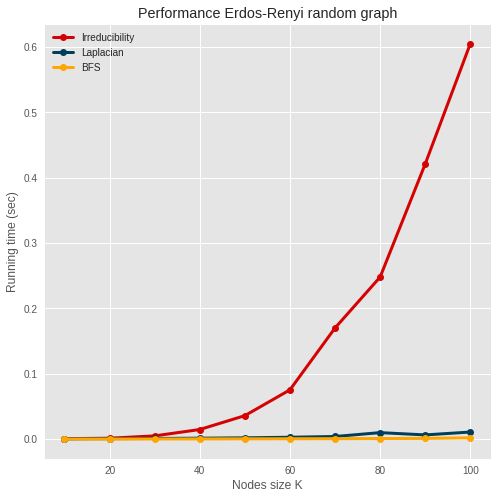

In [ ]:
## Plot performance ER Graph
plt.subplots(figsize = (8, 8))
plt.plot(list(range(10, 110, 10)), irr_er_k, label = 'Irreducibility', marker = 'o', color = '#d40202')
plt.plot(list(range(10, 110, 10)), eig_er_k, label = 'Laplacian', marker = 'o', color = '#003f5c')
plt.plot(list(range(10, 110, 10)), bfs_er_k, label = 'BFS', marker = 'o', color = '#ffa600')
plt.xlabel('Nodes size K')
plt.ylabel('Running time (sec)')
plt.title('Performance Erdos-Renyi random graph')
plt.legend(loc = "upper left")
plt.show()

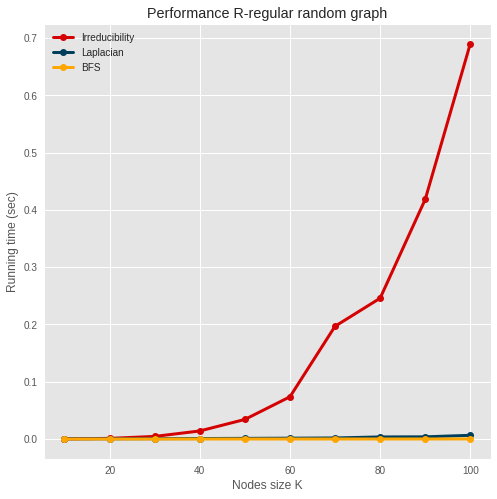

In [ ]:
## Plot performance RR Graph
plt.subplots(figsize = (8,8))
plt.plot(list(range(10, 110, 10)), irr_rr_k, label = 'Irreducibility', marker = 'o', color = '#d40202')
plt.plot(list(range(10, 110, 10)), eig_rr_k, label = 'Laplacian', marker = 'o', color = '#003f5c')
plt.plot(list(range(10, 110, 10)), bfs_rr_k, label = 'BFS', marker = 'o', color = '#ffa600')
plt.xlabel('Nodes size K')
plt.ylabel('Running time (sec)')
plt.title('Performance R-regular random graph')
plt.legend(loc = "upper left")
plt.show()

4.

In [ ]:
## Monte-Carlo simulation for Erdos-Renyi graph
def MC_simulation_ER(k = 100):
    
    res_p = []
    probs = np.arange(0, 1.025, 0.025)
    for p in tqdm(list(probs)):
        res_M = []
        for M in range(1000):
            g_er = graph_ER(K = k, p = p)

            res = bfs(g_er)
            res_M.append(res)
        res_p.append(np.mean(res_M))    
    return res_p

In [ ]:
## Monte-Carlo simulation for r-regular random graph
def MC_simulation_RR(r):
    res_M = []
    res_k = []
    for k in tqdm(range(10,101)):
        for M in range(1000):
            g_rr = graph_RR(d = r, n = k)
            res = bfs(g_rr)
            res_M.append(res)
        res_k.append(np.mean(res_M))    
    return res_k

In [ ]:
## MC simulation ER Graph
mc_gr = MC_simulation_ER(100)

100%|██████████| 41/41 [03:54<00:00,  5.73s/it]


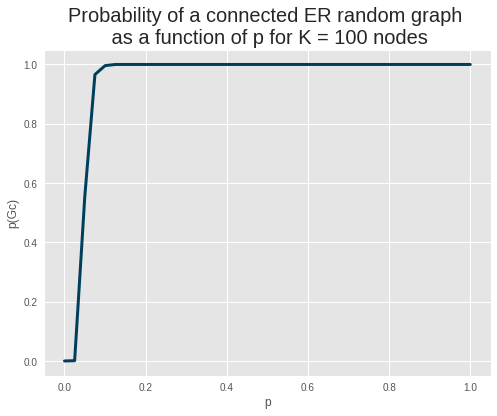

In [ ]:
## Plot MC simulation ER Graph
plt.subplots(figsize = (8, 6))
plt.plot(list(np.arange(0, 1.025, 0.025)), mc_gr, linewidth = 3, color = '#003f5c')

plt.xlabel('p', fontsize = 12)
plt.ylabel('p(Gc)', fontsize = 12)
plt.title('Probability of a connected ER random graph \n as a function of p for K = 100 nodes', fontsize=20)
plt.show()

In [ ]:
## MC simulation RR Graph
r2 = MC_simulation_RR(r = 2)
r8 = MC_simulation_RR(r = 8)

100%|██████████| 91/91 [02:14<00:00,  1.48s/it]


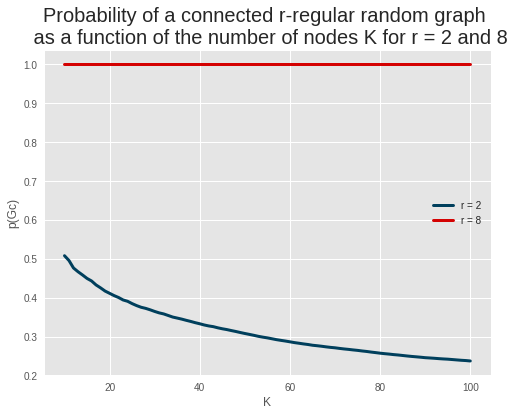

In [ ]:
## Plot MC simulation RR Graph
plt.subplots(figsize = (8, 6))
plt.plot(list(range(10,101)), r2, label = 'r = 2', linewidth = 3, color = '#003f5c')
plt.plot(list(range(10,101)), r8, label = 'r = 8', linewidth = 3, color = '#d40202')

plt.xlabel('K', fontsize = 12)
plt.ylabel('p(Gc)', fontsize = 12)
plt.title('Probability of a connected r-regular random graph \n as a function of the number of nodes K for r = 2 and 8', fontsize = 20)
plt.legend(loc = "center right")
plt.show()

#### Part 2

1.

Find $r$ (# of switch ports to be connected to other switches
in Jellyfish) as a function of $n$ so that $N$ and $S$ are the same
for Jellyfish and Fat-tree. 
$r = \frac{4n}{5}$

4.

In [12]:
## Create fat tree graph and regular random graph
fat_tree = fnss.fat_tree_topology(10)
random_reg = graph_RR(8, 125)

In [13]:
## Remove random edges 
def comparison(g_type):
    res = []
    for f in np.arange(0, 1.1, 0.1):
        ## Create fat tree graph or regular random graph
        if g_type == 'fat-tree':
            G = fnss.fat_tree_topology(10)
        else:
            G = graph_RR(8, 125)
        k = np.ceil(f * len(G.edges))
        rl = random.sample(G.edges, int(k))
        for i in rl:
            G.remove_edge(i[0], i[1])

        ## Compute Pc
        giant = max(nx.connected_components(G), key = len)
        Pc = len(giant) / len(G.nodes)
        res.append(Pc)
    return res

In [14]:
## Multiplicity eigenvalue of the Laplacian matrix
def connected_component(G):
    A_ER = np.array(nx.adjacency_matrix(G).todense())
    D_ER = np.zeros((A_ER.shape[0], A_ER.shape[1]))

    for i in range(A_ER.shape[0]):
        D_ER[i][i] = sum(A_ER[i][:])
    L_ER = D_ER - A_ER
    eig = list(np.linalg.eigvals(L_ER))
    return eig.count((min(eig)))

In [15]:
## Check
res1 = comparison('fat-tree')

In [16]:
## Check
res2 = comparison('')

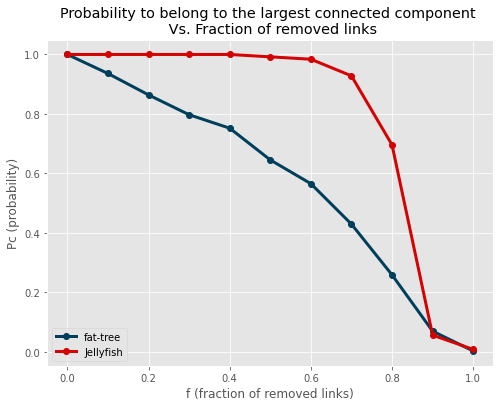

In [17]:
## Plot Pc
plt.subplots(figsize = (8, 6))
plt.plot(list(np.arange(0, 1.1, 0.1)), res1, label = 'fat-tree', linewidth = 3, marker = "o", color = '#003f5c')
plt.plot(list(np.arange(0, 1.1, 0.1)), res2, label = 'Jellyfish', linewidth = 3, marker = "o", color = '#d40202')

plt.title('Probability to belong to the largest connected component \n Vs. Fraction of removed links')
plt.xlabel('f (fraction of removed links)', fontsize = 12)
plt.ylabel('Pc (probability)', fontsize = 12)
plt.legend(loc = "lower left")
plt.show()